## ダイクストラ法を使った最短経路探索

In [1]:
import numpy as np
from graphviz import Graph, Digraph

In [2]:
## 便利関数 ##
## 配列(ver)を渡せば、対応するノードの番号を返す
def getVerBoolian(ver):
    path = []
    for i, ver_bool in enumerate(ver):
        if bool(ver_bool):
            path.append(i)
    return path

## startからgoalまでのコストをweight配列を参照して返す
def getCost(start, goal, targetWeight):
    return targetWeight[start][goal]

## 任意のノードと接続してるノードとのコストを返す(verticsと同じ並び順)
def getConnectedNodesCost(node_num, val, targetWeight):
    return (targetWeight[node_num][targetWeight[node_num]!=val]).tolist()

In [3]:
##  既知情報  ##
node_num = 6
edge_num = 9

## ( source | destination | weight )
edges = [(0,1,7),  (0,2,9),  (0,5,14),           #0
         (1,0,7),  (1,2,10), (1,3,15),           #1
         (2,0,9),  (2,1,10), (2,3,11), (2,5,2),  #2
         (3,1,15), (3,2,11), (3,4,6),            #3
         (4,3,6),  (4,5,9),                      #4
         (5,0,14), (5,2,2),  (5,4,9)]            #5
np_edges = np.array(edges)

## 探索条件
con_start = 0
con_goal  = 4

In [4]:
## 構造体の作成(class)
class Node:
    def __init__(self, name, destinations, weights):
        self.name = name
        self.destinations = destinations
        self.weights = weights
        
        self.label = float('INF')
        self.confirmed = False
        self.min_path = None

In [5]:
## ノードリストの作成
nodes = []
for i in range(node_num):
    matched_indexes = np.where(np_edges[:,0]==i)
    element_node   = np_edges[matched_indexes][:,1]
    element_weight = np_edges[matched_indexes][:,2]

    nd = Node(i, element_node,  weights=element_weight)
    nodes.append(nd)
nodes

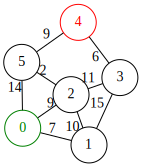

In [6]:
## 隣接リスト -> 隣接行列
vertics_matrix = np.zeros((node_num, node_num), np.uint8)
weights_matrix = vertics_matrix.copy()

for i, node in enumerate(nodes):
    destinations = node.destinations
    vertics_matrix[i][destinations] = 1
    weights_matrix[i][destinations] = node.weights

## 上三角行列
vertics_triu_matrix = np.triu(vertics_matrix)
weights_triu_matrix = np.triu(weights_matrix)

## グラフ構造のヴィジュアライズ
graph = Graph(format='png', engine='fdp')

## ノードの作成
for i in range(node_num):
    if i == con_start:
        graph.attr("node", shape='circle', color="green", fontcolor="green")
    elif i == con_goal:
        graph.attr("node", shape='circle', color="red", fontcolor="red")
    else:
        graph.attr("node", shape='circle', color="black", fontcolor="black")
    graph.node(str(i))

## エッジの作成
for i in range(node_num):
    for j in getVerBoolian(vertics_triu_matrix[i]):
        cost = getCost(i, j, targetWeight=weights_matrix)
        graph.edge(str(i), str(j), label=str(getCost(i, j, targetWeight=weights_matrix)))

graph.render("ngraphs")
display(graph)

In [7]:
## 初期設定
cfm = [0]*len(nodes)

nodes[con_start].label = 0        #スタートのラベルを0に設定
nodes[con_start].confirmed = True #スタートを確定

min_label    = nodes[con_start].label
current_node = nodes[con_start]

## 探索
while(all(cfm) != True):
    #未確定ノードから最小値のラベルを選択
    min_label = float('INF')
    for node in nodes:
        if (node.confirmed == False) and (min_label > node.label):
            min_label    = node.label
            current_node = node
            
    #ノードの確定
    current_node.confirmed = True
    
    #接続ノードのラベル更新
    min_weight = float('INF')
    min_path   = []
    weights = current_node.weights
    for i, dst in enumerate(current_node.destinations):
        dts_nd = nodes[dst]
        if dts_nd.confirmed == False:
            total_cost = current_node.label + weights[i]
            #ラベルの更新
            if dts_nd.label > total_cost:
                dts_nd.label = total_cost
                nodes[dts_nd.name].min_path = current_node.name
            #最善ノードの確定
            if min_weight > total_cost:
                min_weight = dts_nd.label
                best_node  = dts_nd
    
    if current_node.name==best_node.name:
        break

In [8]:
## 探索結果の表示
print("COST : {0}\nPATH : {1} <- ".format(nodes[con_goal].label, con_goal), end="")
next_path = con_goal
while(True):
    next_path = nodes[next_path].min_path
    if (next_path != None) and (next_path != con_start):
        print("{} <- ".format(next_path), end="")
    else:
        print(con_start)
        break

COST : 20
PATH : 4 <- 5 <- 2 <- 0
